In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df_raw=pd.read_csv('/Users/damonx/Documents/_Archive/6k_WORKING/data/fredgraph.csv')


In [5]:
df=df_raw.copy()
df

,observation_date,BLOO017UR,CHAM517UR,CHIC917UR,DANV117UR,DAVE317UR,DECA517UR,KANK117UR,PEOR917UR,ROCK417UR,SPRI117UR,STLUR
0,1990-01-01,3.3,3.2,6.2,8.4,4.8,6.5,6.5,4.8,5.6,3.6,5.6
1,1990-02-01,3.3,3.2,6.2,8.4,4.8,6.5,6.5,4.8,5.6,3.6,5.6
2,1990-03-01,3.2,3.2,6.2,8.4,4.8,6.5,6.5,4.8,5.5,3.6,5.5
3,1990-04-01,3.2,3.1,6.2,8.4,4.8,6.4,6.5,4.8,5.4,3.6,5.5
4,1990-05-01,3.2,3.1,6.3,8.4,4.8,6.3,6.4,4.8,5.4,3.5,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...
426,2025-07-01,3.4,3.5,4.8,NaN,4.7,5.3,4.8,4.2,4.7,3.8,3.9
427,2025-08-01,3.5,3.6,4.6,NaN,4.9,5.4,5.1,4.4,4.9,3.9,4.0
428,2025-09-01,3.7,3.8,4.5,NaN,5.1,5.6,5.3,4.6,5.1,4.1,4.1
429,2025-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()
# 2025-10-01 is all NaN, and only DANV117UR has more than 10 NaN values in 2025.

observation_date     0
BLOO017UR            1
CHAM517UR            1
CHIC917UR            1
DANV117UR           11
DAVE317UR            1
DECA517UR            1
KANK117UR            1
PEOR917UR            1
ROCK417UR            1
SPRI117UR            1
STLUR                1
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  431 non-null    object 
 1   BLOO017UR         430 non-null    float64
 2   CHAM517UR         430 non-null    float64
 3   CHIC917UR         430 non-null    float64
 4   DANV117UR         420 non-null    float64
 5   DAVE317UR         430 non-null    float64
 6   DECA517UR         430 non-null    float64
 7   KANK117UR         430 non-null    float64
 8   PEOR917UR         430 non-null    float64
 9   ROCK417UR         430 non-null    float64
 10  SPRI117UR         430 non-null    float64
 11  STLUR             430 non-null    float64
dtypes: float64(11), object(1)
memory usage: 40.5+ KB


In [10]:
df.describe()

,BLOO017UR,CHAM517UR,CHIC917UR,DANV117UR,DAVE317UR,DECA517UR,KANK117UR,PEOR917UR,ROCK417UR,SPRI117UR,STLUR
count,430.000000,430.000000,430.000000,420.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,4.151163,4.579535,6.348140,7.567143,5.161860,7.162093,7.008140,5.718837,7.111163,4.964651,5.353256
std,1.503108,1.623746,2.022573,1.973322,1.500206,2.017691,2.277477,1.949740,2.912055,1.554678,1.777593
min,1.700000,2.300000,3.600000,4.300000,3.000000,3.900000,4.200000,2.900000,3.600000,3.100000,2.700000
25%,3.200000,3.500000,4.800000,6.000000,4.100000,5.700000,5.500000,4.500000,5.200000,3.900000,3.925000
50%,3.800000,4.200000,5.800000,7.100000,4.800000,6.700000,6.400000,5.200000,6.400000,4.500000,5.100000
75%,4.675000,5.000000,7.175000,8.900000,5.800000,8.075000,7.600000,6.300000,8.200000,5.400000,6.100000
max,13.200000,11.900000,19.000000,17.700000,15.900000,15.300000,16.600000,17.000000,22.200000,15.600000,12.300000


In [15]:
df['observation_date'] = pd.to_datetime(df['observation_date'])

In [17]:
df.dtypes

observation_date    datetime64[ns]
BLOO017UR                  float64
CHAM517UR                  float64
CHIC917UR                  float64
DANV117UR                  float64
DAVE317UR                  float64
DECA517UR                  float64
KANK117UR                  float64
PEOR917UR                  float64
ROCK417UR                  float64
SPRI117UR                  float64
STLUR                      float64
dtype: object

In [18]:
df.columns = [
    'observation_date',
    'Bloomington',
    'Champaign-Urbana',
    'Chicago-Naperville-Elgin',
    'Danville',
    'Davenport-Moline-Rock Island',
    'Decatur',
    'Kankakee',
    'Peoria',
    'Rockford',
    'Springfield',
    'St. Louis'
]

In [19]:
df = df.set_index('observation_date')

Text(0, 0.5, 'Unemployment Rate (%)')

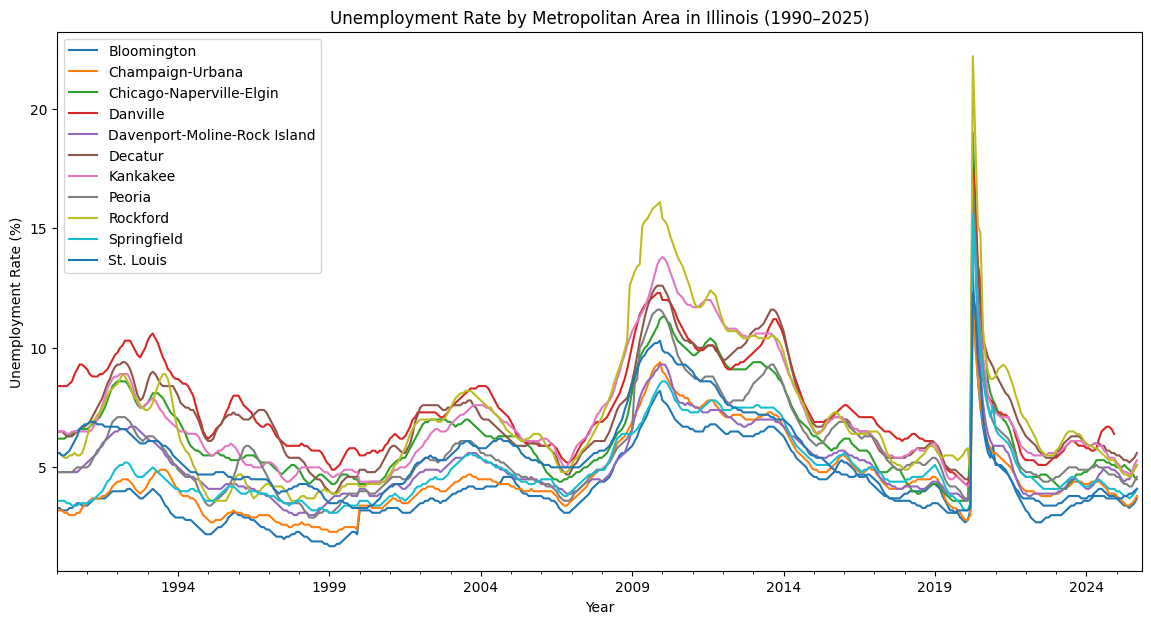

In [22]:
ax = df.plot(figsize=(14, 7), linewidth=1.5)
ax.set_title('Unemployment Rate by Metropolitan Area in Illinois (1990–2025)')
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment Rate (%)')

<Axes: xlabel='observation_date'>

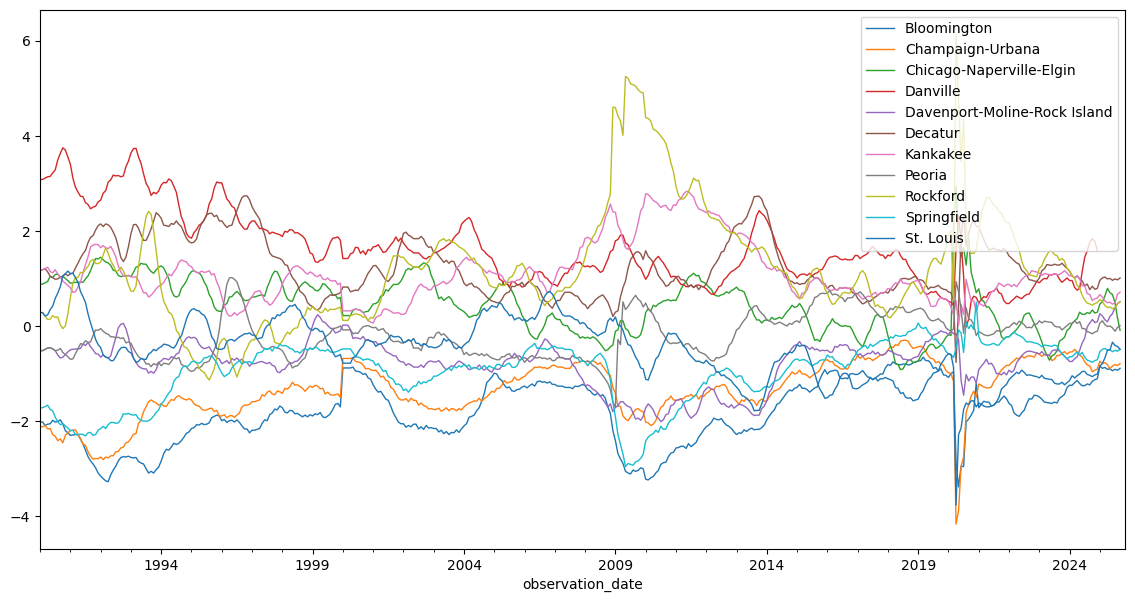

In [23]:
(df
 .sub(df.mean(axis=1), axis=0)
 .plot(figsize=(14, 7), linewidth=1)
)

In [26]:
df_5y = (
    df
    .groupby(pd.Grouper(freq='5Y'))
    .mean()
)
df_5y

/var/folders/v7/0wrl92kx1bv_rbgc4_ccwm2r0000gn/T/ipykernel_6425/1307936080.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .groupby(pd.Grouper(freq='5Y'))


,Bloomington,Champaign-Urbana,Chicago-Naperville-Elgin,Danville,Davenport-Moline-Rock Island,Decatur,Kankakee,Peoria,Rockford,Springfield,St. Louis
observation_date,,,,,,,,,,,
1990-12-31,3.333333,3.141667,6.383333,8.741667,4.850000,6.475000,6.483333,4.875000,5.550000,3.508333,5.991667
1995-12-31,3.301667,3.843333,6.943333,8.720000,5.376667,7.841667,7.048333,5.353333,6.541667,4.288333,5.716667
2000-12-31,2.411667,2.793333,4.770000,6.030000,3.660000,5.453333,4.806667,3.991667,4.096667,3.536667,3.948333
2005-12-31,3.843333,4.141667,6.315000,7.165000,4.853333,6.775000,6.441667,5.186667,6.856667,4.633333,5.465000
2010-12-31,5.308333,6.055000,7.278333,8.538333,6.023333,8.093333,9.076667,6.851667,9.826667,5.950000,7.208333
2015-12-31,5.946667,6.525000,8.315000,9.106667,6.590000,9.295000,9.548333,7.786667,9.606667,6.741667,6.916667
2020-12-31,4.560000,4.778333,5.706667,6.870000,5.150000,6.585000,6.371667,6.046667,6.836667,5.345000,4.391667
2025-12-31,3.839655,4.194828,5.058621,5.989583,4.520690,6.196552,5.829310,4.958621,6.298276,4.534483,3.641379


<Axes: xlabel='observation_date'>

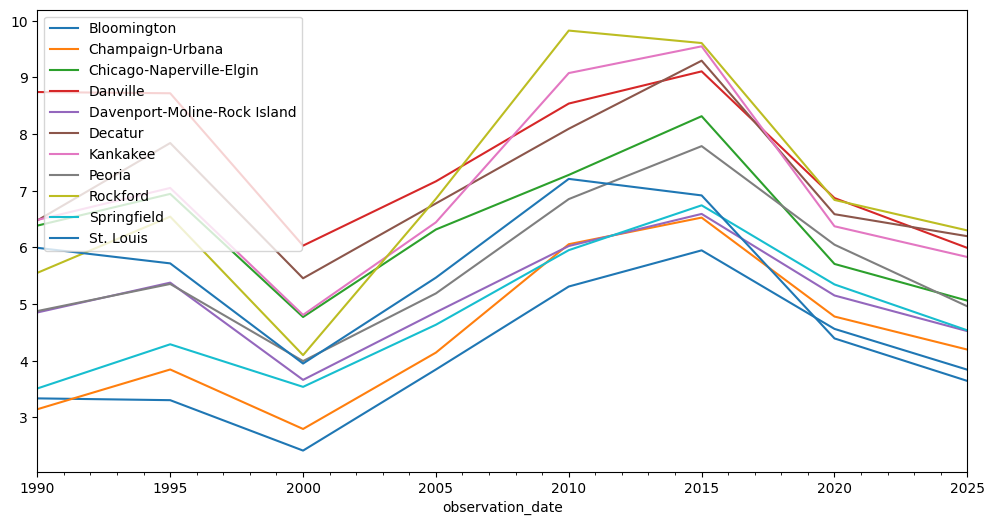

In [25]:
df_5y.plot(figsize=(12,6))

In [28]:
windows = {
    "Baseline_1990_2025": ("1990-01-01", "2025-12-31"),
    "1990_1995": ("1990-01-01", "1995-12-31"),
    "1995_2000": ("1995-01-01", "2000-12-31"),
    "Financial_Crisis_2008_2012": ("2008-01-01", "2012-12-31"),
    "COVID_2019_2022": ("2019-12-01", "2022-12-31"),
}

In [29]:
import matplotlib.pyplot as plt

def plot_window(df, start, end, title):
    window_df = df.loc[start:end]

    plt.figure(figsize=(10, 6))
    for col in window_df.columns:
        plt.plot(window_df.index, window_df[col], label=col, alpha=0.8)

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

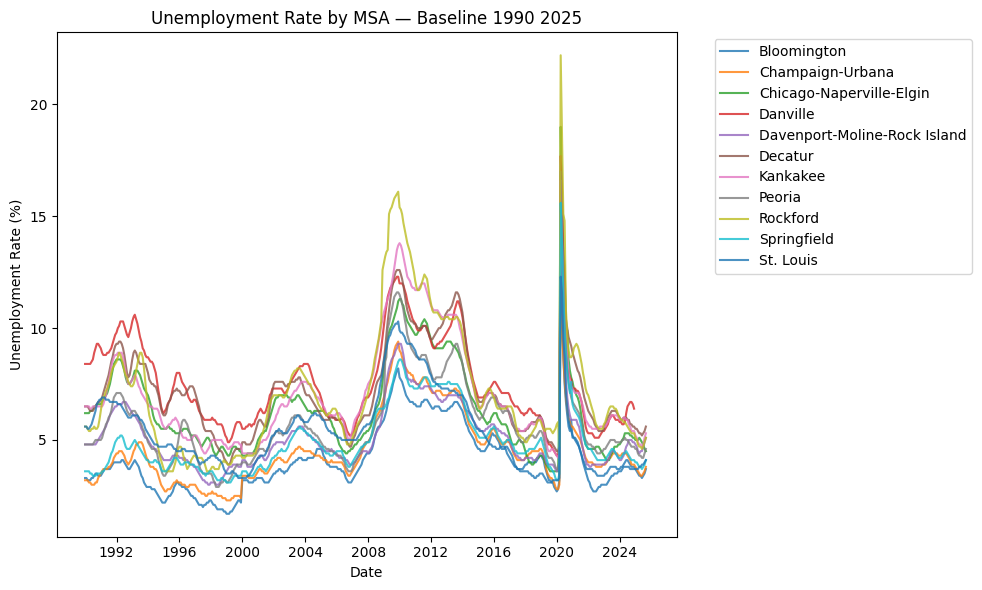

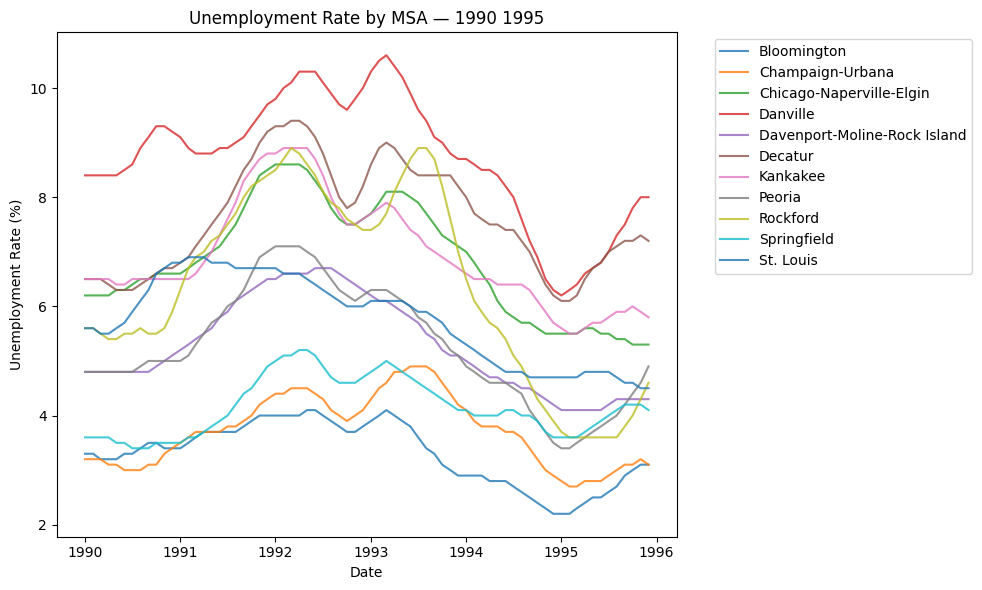

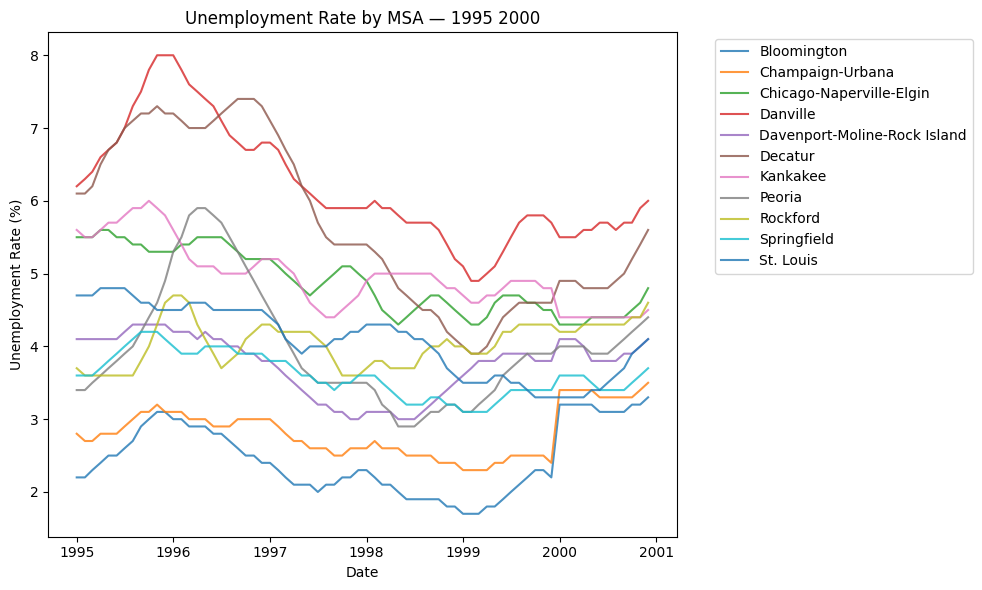

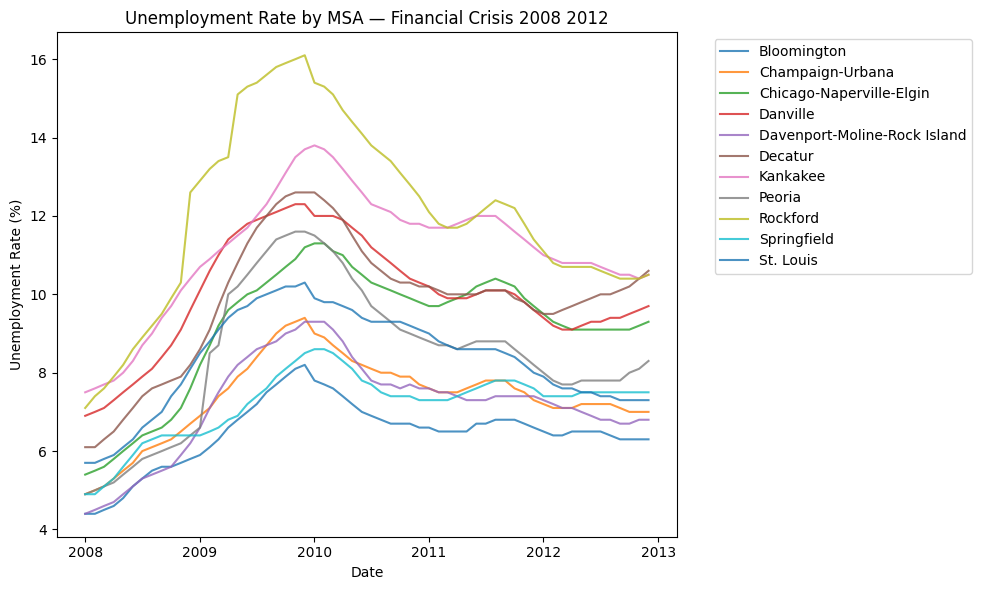

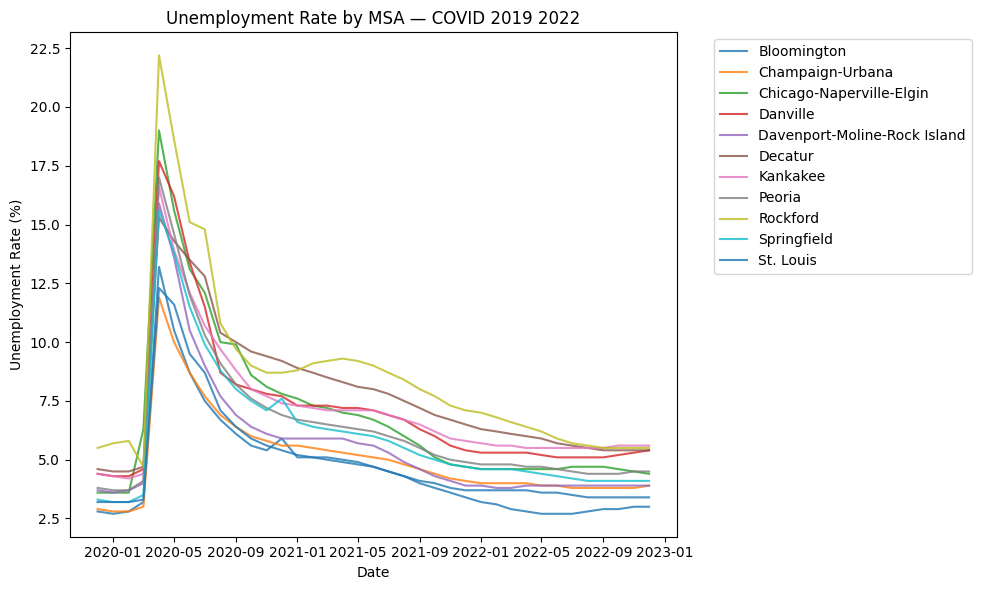

In [30]:
for name, (start, end) in windows.items():
    plot_window(
        df,
        start,
        end,
        title=f"Unemployment Rate by MSA — {name.replace('_', ' ')}"
    )